In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
%matplotlib inline

In [2]:
filepath = '/'

In [3]:
df_train=pd.read_csv(filepath + 'training_set.csv')
df_train.head()

,image_name,x1,x2,y1,y2
0,JPEG_20160517_140621_10006510318320.png,78,446,83,422
1,1473231510890DeeplearnS114560.png,73,567,146,351
2,1476881557883Untitled10.png,13,561,124,362
3,JPEG_20160711_113321_10002357419920.png,217,442,65,465


In [4]:
df_train.shape

(4, 5)

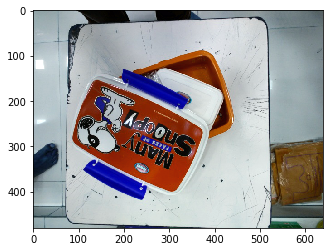

In [5]:
im = cv2.imread(filepath + 'images/' + df_train.image_name[0])
alpha = 0.75
beta = -20
new_im = cv2.convertScaleAbs(im, alpha=alpha, beta=beta)
plt.imshow(im)

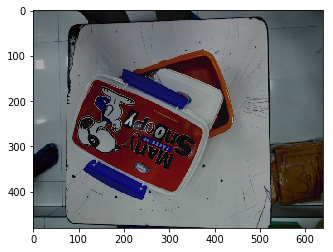

In [6]:
plt.imshow(new_im)

In [7]:
alphas = np.array([1.25, 0.75, 1.1, 0.9, 0.8, 1.2, 0.7, 1.3])
betas = np.array([-30, -20, -10, 10, 20, 30, -5, 5])

In [8]:
df_aug = df_train.copy()

In [9]:
for image in tqdm(df_train.image_name):
    im = cv2.imread(filepath + 'images/' + image)
    for i in range(1):
        a = np.random.choice(alphas)
        b = np.random.choice(betas)
        new_im = cv2.convertScaleAbs(im, alpha=a, beta=b)
        fname = filepath + 'images/' + image[:-4] + str(i) + '.png'
        cv2.imwrite(fname, new_im)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 38.94it/s]


In [10]:
df_train0 = df_train.copy()
df_train1 = df_train.copy()
df_train2 = df_train.copy()
df_train3 = df_train.copy()

In [11]:
def str0(string):
    return string[:-4] + '0' + string[-4:]

In [12]:
tqdm.pandas()

In [13]:
df_train0.image_name = df_train0.image_name.progress_apply(str0)

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


In [14]:
def str1(string):
    return string[:-4] + '1' + string[-4:]

In [15]:
df_train1.image_name = df_train1.image_name.progress_apply(str1)

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4006.98it/s]


In [16]:
df_train1.head()

,image_name,x1,x2,y1,y2
0,JPEG_20160517_140621_100065103183201.png,78,446,83,422
1,1473231510890DeeplearnS1145601.png,73,567,146,351
2,1476881557883Untitled101.png,13,561,124,362
3,JPEG_20160711_113321_100023574199201.png,217,442,65,465


In [17]:
def str2(string):
    return string[:-4] + '2' + string[-4:]

df_train2.image_name = df_train2.image_name.progress_apply(str2)

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4019.46it/s]


In [18]:
df_train2.head()

,image_name,x1,x2,y1,y2
0,JPEG_20160517_140621_100065103183202.png,78,446,83,422
1,1473231510890DeeplearnS1145602.png,73,567,146,351
2,1476881557883Untitled102.png,13,561,124,362
3,JPEG_20160711_113321_100023574199202.png,217,442,65,465


In [19]:
def str3(string):
    return string[:-4] + '3' + string[-4:]

df_train3.image_name = df_train3.image_name.progress_apply(str3)

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4002.20it/s]


In [20]:
df_train3.head()

,image_name,x1,x2,y1,y2
0,JPEG_20160517_140621_100065103183203.png,78,446,83,422
1,1473231510890DeeplearnS1145603.png,73,567,146,351
2,1476881557883Untitled103.png,13,561,124,362
3,JPEG_20160711_113321_100023574199203.png,217,442,65,465


In [21]:
df_train_final = pd.concat([df_train, df_train0])

In [22]:
df_train_final.to_csv(filepath + '/training_Aug.csv', index=False)

## Apply flips

In [23]:
df_train=pd.read_csv(filepath + 'training_Aug.csv')

In [24]:
df_train

,image_name,x1,x2,y1,y2
0,JPEG_20160517_140621_10006510318320.png,78,446,83,422
1,1473231510890DeeplearnS114560.png,73,567,146,351
2,1476881557883Untitled10.png,13,561,124,362
3,JPEG_20160711_113321_10002357419920.png,217,442,65,465
4,JPEG_20160517_140621_100065103183200.png,78,446,83,422
5,1473231510890DeeplearnS1145600.png,73,567,146,351
6,1476881557883Untitled100.png,13,561,124,362
7,JPEG_20160711_113321_100023574199200.png,217,442,65,465


In [25]:
im = cv2.imread(filepath + 'images/' + df_train.image_name[0])
hz_img = cv2.flip(im, 1)
vt_img = cv2.flip(im, 0)
hv_img = cv2.flip(im, -1)

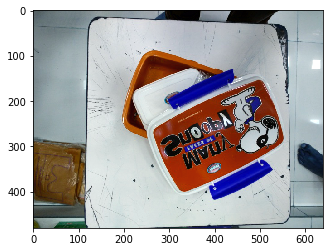

In [26]:
plt.imshow(hz_img)

In [27]:
df_train.shape

(8, 5)

In [28]:
hx1 = []
hx2 = []
hy1 = []
hy2 = []
vx1 = []
vx2 = []
vy1 = []
vy2 = []
hvx1 = []
hvx2 = []
hvy1 = []
hvy2 = []
hname = []
vname = []
hvname = []
for index_, row in tqdm(list(df_train.iterrows())):
    im = cv2.imread(filepath  + 'images/' + row['image_name'])
    him = cv2.flip(im, 1)
    hx1.append(640 - row['x2'])
    hx2.append(640 - row['x1'])
    hy1.append(row['y1'])
    hy2.append(row['y2'])
    vim = cv2.flip(im, 0)
    vx1.append(row['x1'])
    vx2.append(row['x2'])
    vy1.append(480 - row['y2'])
    vy2.append(480 - row['y1'])
    hvim = cv2.flip(im, -1)
    hvx1.append(640 - row['x2'])
    hvx2.append(640 - row['x1'])
    hvy1.append(480 - row['y2'])
    hvy2.append(480 - row['y1'])
    hfname = filepath + 'images/' + row['image_name'][:-4] + 'h' + '.png'
    vfname = filepath + 'images/' + row['image_name'][:-4] + 'v' + '.png'
    hvfname = filepath + 'images/' + row['image_name'][:-4] + 'x' + '.png'
    hname.append(hfname)
    vname.append(vfname)
    hvname.append(hvfname)
    cv2.imwrite(hfname, him)
    cv2.imwrite(vfname, vim)
    cv2.imwrite(hvfname, hvim)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 24.01it/s]


In [29]:
len(hx1)

8

In [30]:
df_h = df_train.copy()

In [31]:
df_h.image_name = hname

In [32]:
df_h.x1 = hx1
df_h.x2 = hx2
df_h.y1 = hy1
df_h.y2 = hy2

In [33]:
def prune(string):
    return string[41:]

In [34]:
df_h.image_name = df_h.image_name.apply(prune)

In [35]:
df_h.tail()

,image_name,x1,x2,y1,y2
3,113321_10002357419920h.png,198,423,65,465
4,140621_100065103183200h.png,194,562,83,422
5,eeplearnS1145600h.png,73,567,146,351
6,ntitled100h.png,79,627,124,362
7,113321_100023574199200h.png,198,423,65,465


In [36]:
df_v = df_train.copy()
df_v.image_name = vname
df_v.x1 = vx1
df_v.x2 = vx2
df_v.y1 = vy1
df_v.y2 = vy2

In [37]:
df_v.image_name = df_v.image_name.apply(prune)

In [38]:
df_v.tail()

,image_name,x1,x2,y1,y2
3,113321_10002357419920v.png,217,442,15,415
4,140621_100065103183200v.png,78,446,58,397
5,eeplearnS1145600v.png,73,567,129,334
6,ntitled100v.png,13,561,118,356
7,113321_100023574199200v.png,217,442,15,415


In [39]:
df_x = df_train.copy()
df_x.image_name = hvname
df_x.x1 = hvx1
df_x.x2 = hvx2
df_x.y1 = hvy1
df_x.y2 = hvy2

In [40]:
df_x.image_name = df_x.image_name.apply(prune)

In [41]:
df_train_final = pd.concat([df_train, df_h, df_v, df_x])

In [42]:
df_train_final.shape

(32, 5)

In [43]:
df_train_final.to_csv(filepath + 'training_Aug.csv', index=False)

In [44]:
df_train.shape

(8, 5)

In [45]:
df_train_final.tail(11)

,image_name,x1,x2,y1,y2
5,eeplearnS1145600v.png,73,567,129,334
6,ntitled100v.png,13,561,118,356
7,113321_100023574199200v.png,217,442,15,415
0,140621_10006510318320x.png,194,562,58,397
1,eeplearnS114560x.png,73,567,129,334
2,ntitled10x.png,79,627,118,356
3,113321_10002357419920x.png,198,423,15,415
4,140621_100065103183200x.png,194,562,58,397
5,eeplearnS1145600x.png,73,567,129,334
6,ntitled100x.png,79,627,118,356


In [46]:
df_train_final.shape

(32, 5)